# Signal processing practice: complex morlet wavelet transform

Ideally I'd do more preprocessing (ICA, etc.) before taking this step. The nature of the data (no eog information, etc.) makes that difficult. Since this is just for some practice, I won't worry about it and will just focus on wavelet transforms here.

In [1]:
import pickle
import numpy as np
import pandas as pd
import wfdb
import mne
import os
from matplotlib import pyplot as plt

X_S = pickle.load(open('X_S.pickle', 'rb'))
X_S_file = pickle.load(open('X_S_file.pickle', 'rb'))
X_NS = pickle.load(open('X_S.pickle', 'rb'))
X_NS_file = pickle.load(open('X_NS_file.pickle', 'rb'))
chan_order_dict = pickle.load(open('chan_order_dict.pickle', 'rb'))

Creating RawArray with float64 data, n_channels=22, n_times=76800


<ipython-input-2-6f781a4d5704>:4: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ['T7-P7', 'P7-O1', 'FP1-F3', 'FP2-F8', 'T8-P8', 'P8-O2', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8']. Their position has been left untouched.
  sfreq=256,ch_types='eeg',montage='standard_postfixed')


    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.


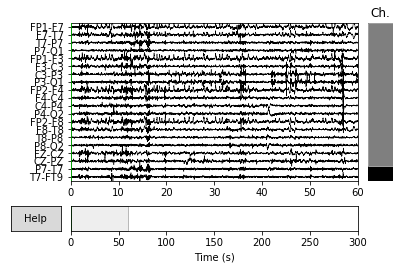

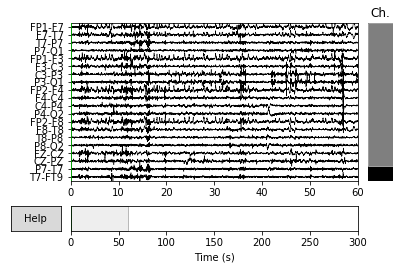

In [2]:
# Plot some raw signals, first 60 seconds

xs_info = mne.create_info(ch_names=[i for i in chan_order_dict.keys()],
                          sfreq=256,ch_types='eeg',montage='standard_postfixed')
xs_mne = mne.io.RawArray(X_S[0],xs_info)
xs_mne.plot(duration=60,scalings='auto')

In [12]:
# Get average channel variance:
e_var = np.var(X_S,2).mean(axis=0)

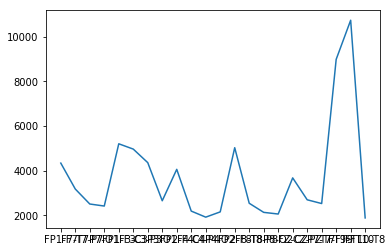

In [14]:
plt.plot(chan_order_dict.keys(),e_var)

In [25]:
sort_e_var = pd.DataFrame({
    'electrode':[i for i in chan_order_dict.keys()],
    'ave variance':e_var}).sort_values('ave variance',ascending=False)
print(sort_e_var)

   electrode  ave variance
20  FT9-FT10  10733.797901
19    T7-FT9   8982.359689
4     FP1-F3   5205.401739
12    FP2-F8   5030.296578
5      F3-C3   4967.949093
6      C3-P3   4361.987418
0     FP1-F7   4340.807079
8     FP2-F4   4061.832018
16     FZ-CZ   3679.230340
1      F7-T7   3180.817095
17     CZ-PZ   2699.760689
7      P3-O1   2656.167903
13     F8-T8   2544.477482
18     P7-T7   2531.376076
2      T7-P7   2510.539157
3      P7-O1   2419.545819
9      F4-C4   2194.162040
11     P4-O2   2158.138632
14     T8-P8   2136.959827
15     P8-O2   2062.398089
10     C4-P4   1922.643677
21   FT10-T8   1888.380163


In [27]:
# To get started, get wavelet transform 
# using first observation, first electrode

In [34]:
# Complex morlet wavelet
# Hz = 5
# create wavelet
srate = 256
time = np.arange(-2,2+1/256,1/256)
freq = 5

In [65]:
# gaussian window
s = 7 / (2*np.pi*freq)

sine_wave = np.exp(1j*2*np.pi*freq*time)
gaus_win = np.exp((-time**2) / (2*s**2))

complex_mw = sine_wave * gaus_win

complex_mw

In [69]:
# test channel
test_chan = X_S[0][0,:]

In [73]:
# Conv parameters
nData = len(test_chan)
nKern = len(complex_mw)
nConv = nData+nKern-1

In [77]:
# Get FFT of wavelet
cmwX = np.fft.fft(complex_mw,nConv)
cmwX = cmwX/max(cmwX)

In [78]:
# Get FFT of data
dataX = np.fft.fft(test_chan,nConv)

In [80]:
# Convolution and inverse fft
conv_res = np.fft.ifft(dataX * cmwX)

In [83]:
# Remove extra ends
half_wav = round(len(complex_mw)/2)+1
conv_res_timedomain = conv_res[np.arange(half_wav-1,len(conv_res)-half_wav+1)]

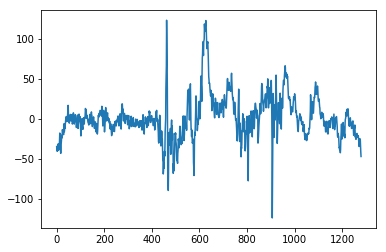

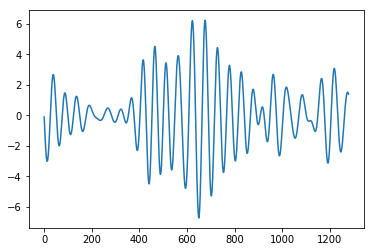

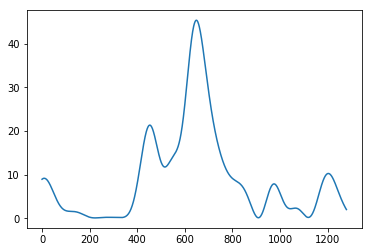

In [101]:
# Plot raw, band-pass (real), power spectrum (magnitude squared, 
# or real^2+imag^2)
sec = 5
plt.plot(test_chan[:sec*256])
plt.show()
plt.plot(np.real(conv_res_timedomain)[:sec*256])
plt.show()
plt.plot(np.real(conv_res_timedomain)[:sec*256]**2+np.imag(conv_res_timedomain)[:sec*256]**2)
plt.show()